## Creating Multi Qubit Circuit

In [ ]:
import qiskit

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

A quantum circuit is composed of quantum and classical registers.

In [ ]:
# Creating a quantum circuit consisting of quantum register qreg and classical register creg
circuit = QuantumCircuit(qreg,creg)

In Qiskit, we use a _quantum register_ to store our qubits.

Whenever a qubit is measured, the result should be stored in a classical bit. We create a _classical register_ to store our classical bits.

In [ ]:

# Creating a quantum circuit with 4 qubits and 4 classical bits
circuit = QuantumCircuit(4,4)

## Here are some multi-qubit Gates

In [ ]:
#Apply CNOT gate where qubit 2 is control and qubit 0 is target
circuit.cx(qreg[2],qreg[0])

#Apply CZ gate where qubit 0 is control and qubit 1 is target
circuit.cz(qreg[0],qreg[1])

#Apply SWAP gates to qubits 1 and 3 
circuit.swap(qreg[1],qreg[3])

#Apply CCNOT gate where qubit 0 and 1 are the control and qubit 2 is the target
#Note that in Qiskit, it is possible to apply gates without specifying the register
circuit.ccx(0,1,2)

Let's Create a circuit that applies a controlled-Z gate between the first and third qubits, and a controlled-X gate between the second and fourth qubits.

In [1]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute

# Create a quantum circuit with four qubits
qc = QuantumCircuit(4)

# Apply a controlled-Z gate between the first and third qubits
qc.cz(0, 2) #0 is the control and 2 is the target

# Apply a controlled-X gate between the second and fourth qubits
qc.cx(1, 3)#1 is the control and 3 is the target

# Print the circuit
print(qc)


             
q_0: ─■──────
      │      
q_1: ─┼───■──
      │   │  
q_2: ─■───┼──
        ┌─┴─┐
q_3: ───┤ X ├
        └───┘


### Generating a Bell State

Consider a two-qubit quantum circuit. Let's implement the following steps using Qiskit to generate a bell state:

1. Prepare the initial state |00⟩.
2. Apply a Hadamard gate (H gate) to the first qubit.
3. Apply a CNOT gate with the first qubit as the control and the second qubit as the target.
4. Measure both qubits and obtain the measurement results.

In [2]:
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)

# Step 1: Prepare the initial state |00⟩
# No operation is needed as the qubits are initially in the |0⟩ state

# Step 2: Apply a Hadamard gate to the first qubit
qc.h(0)

# Step 3: Apply a CNOT gate with the first qubit as the control and the second qubit as the target
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Simulate the circuit using the Qiskit Aer simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()

# Get the counts of the measurement outcomes
counts = result.get_counts(qc)
print(counts)


{'00': 486, '11': 514}


## Quantum Teleportation Protocol

We will illustrate quantum teleportation with a story. Alice and Bob during their childhood shared a Bell state |β00⟩, where the first qubit Q1 belongs to Alice and qubit Q2 belongs to Bob. Bob had to relocate to a different city because of work commitments. Now Alice wants to share some information: a third qubit Q0 state ∣ψ⟩ = ∣1⟩ to Bob.


In [15]:
from qiskit import *

We will need 3 qubit where Q1 belongs to Alice, qubit Q2 belongs to Bob and qubit Q0 is the qubit that conatins the new information that Alice wants to send to Bob.

In [16]:
circuit = QuantumCircuit(3,3)

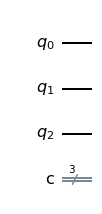

In [17]:
%matplotlib inline
circuit.draw(output ='mpl')

Since the information that alice want to send to bob is ∣1⟩, we apply an X gate to convert the sate to ∣1⟩

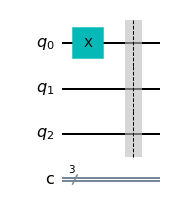

In [18]:
circuit.x(0)
circuit.barrier()
circuit.draw(output ='mpl')

Here we create the shared Childhood Bell state between Alice's Q1 and Bob's Q2, this means Q1 and Q2 are enatangled. By applying the Hadamard and CNOT gate we can create a bell state of enatangled Q1 and Q2.

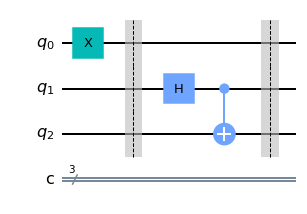

In [19]:
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.draw(output ='mpl')

Let prepare Alice quantum state by applying a CNOT between her two qubit (Q0 as the control and Q2 as the target) and an hadamard on the qubit she wants to send (Q1). Now Q0 is entangled with the bell pair formed by Q1 and Q2

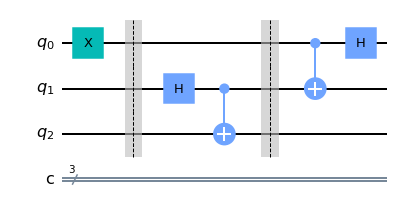

In [20]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output ='mpl')

We proceed with performing measurements on Alice quantum state (Q0) and the Bell pair (Q1), and sending the measurement outcomes to Bob through the classical registers. The measurement performed on the first two qubits destroys the qubits, and the third qubit is delivered to the receiver.

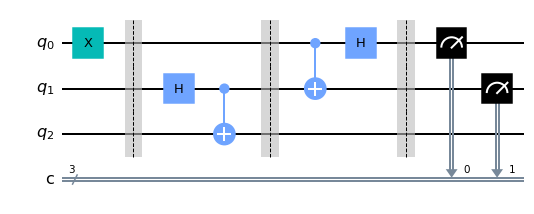

In [21]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output ='mpl')

To complete the teleportation protocol, bob then applies a CNOT and a CZ to reconstruct the original quantum state.

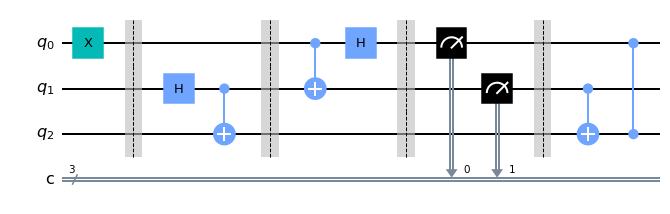

In [22]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output ='mpl')

To verify let's measure Bob Qubit to see if it has recieved ∣1⟩ send by Alice.

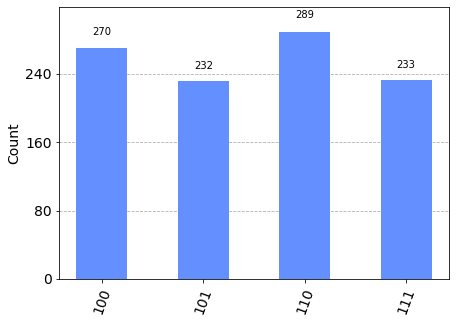

In [26]:
circuit.measure(2,2)
simulate = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend =simulator, shots =1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [27]:
print(counts)

{'111': 233, '100': 270, '101': 232, '110': 289}


In [ ]:
This result shows that for all the possible state the qubit are in state 